<a href="https://colab.research.google.com/github/ikadeksandratiana/DataAnalytics/blob/main/UAS_19101223_I_Kadek_Sandratiana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!kaggle datasets download -d rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba

  0% 0.00/455k [00:00<?, ?B/s]
100% 455k/455k [00:00<00:00, 45.1MB/s]


In [9]:
!pip install igraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.3 MB/s 


In [10]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  groceries-dataset-for-market-basket-analysismba.zip
  inflating: Groceries data.csv      
  inflating: basket.csv              


In [11]:
import numpy as np 
import pandas as pd 
from itertools import permutations
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import parallel_coordinates
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import networkx as nx
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
import plotly
import igraph as ig
from plotly.graph_objs import *

In [12]:
df = pd.read_csv("Groceries data.csv")
bk = pd.read_csv("basket.csv")
df

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,1
1,2552,2015-05-01,whole milk,2015,5,1,4
2,2300,2015-09-19,pip fruit,2015,9,19,5
3,1187,2015-12-12,other vegetables,2015,12,12,5
4,3037,2015-01-02,whole milk,2015,1,2,4
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,6
38761,2022,2014-02-23,candy,2014,2,23,6
38762,1097,2014-04-16,cake bar,2014,4,16,2
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,2


In [13]:
# review the unique values in the member ID and item columns
print(len(df['Member_number'].unique()))
print(len(df['itemDescription'].unique()))

3898
167


In [14]:
# review the value counts
freq_items = df['itemDescription'].value_counts()
freq_items.head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

In [15]:
# plot a bar chart to see the top sold items
fig = px.bar(data_frame=freq_items.head(40), title='Top 40 Items', color=freq_items.head(40),
                 labels={
                     "index": "Items",
                     "values": "Quantity",
                     'lift': 'Lift'
                 })
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

In [16]:
# list items by member IDs
user_id = df['Member_number'].unique()
items = [list(df.loc[df['Member_number'] == id, 'itemDescription']) for id in user_id]
print(items[0])

['tropical fruit', 'long life bakery product', 'meat', 'sugar', 'rolls/buns', 'semi-finished bread', 'whole milk', 'citrus fruit', 'candy', 'napkins']


In [17]:
# create a item matrix
TE = TransactionEncoder()
TE.fit(items)
item_transformed = TE.transform(items)
item_matrix = pd.DataFrame(item_transformed, columns = TE.columns_)
item_matrix.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False


In [18]:
# get the support value by Apriori algorithm
freq_items = apriori(item_matrix, min_support=0.01, use_colnames=True, max_len=2)
freq_items.sort_values(by = "support", ascending = False)

,support,itemsets
113,0.458184,(whole milk)
69,0.376603,(other vegetables)
84,0.349666,(rolls/buns)
94,0.313494,(soda)
114,0.282966,(yogurt)
...,...,...
414,0.010005,"(butter milk, frankfurter)"
705,0.010005,"(whole milk, dog food)"
882,0.010005,"(hygiene articles, newspapers)"
1106,0.010005,"(waffles, pork)"


In [19]:
# create a datafram with product support, confidence , and lift values
rules = association_rules(freq_items, metric = "confidence", min_threshold = 0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960
...,...,...,...,...,...,...,...,...,...
2247,(white wine),(whole milk),0.044125,0.458184,0.023602,0.534884,1.167400,0.003384,1.164905
2248,(white wine),(yogurt),0.044125,0.282966,0.016419,0.372093,1.314976,0.003933,1.141944
2249,(yogurt),(white wine),0.282966,0.044125,0.016419,0.058024,1.314976,0.003933,1.014754
2250,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076


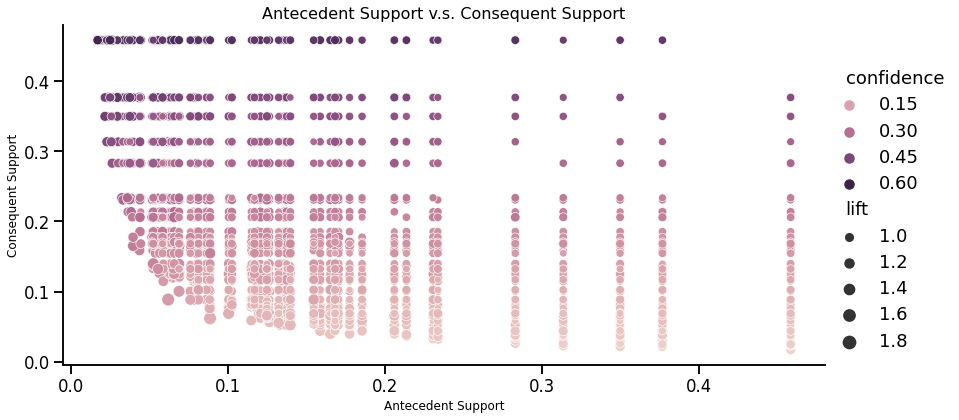

In [20]:
# take a quick look at the distribution of the product combination
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=rules, 
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

In [21]:
# add a column for a Zhang's core
def zhangs_rule(rules):
    rule_support = rules['support'].copy()
    rule_ante = rules['antecedent support'].copy()
    rule_conseq = rules['consequent support'].copy()
    num = rule_support - (rule_ante * rule_conseq)
    denom = np.max((rule_support * (1 - rule_ante).values, 
                          rule_ante * (rule_conseq - rule_support).values), axis = 0)
    return num / denom

rules_zhangs_list = zhangs_rule(rules)
rules = rules.assign(zhang = rules_zhangs_list)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,(beef),(UHT-milk),0.119548,0.078502,0.010518,0.087983,1.120775,0.001133,1.010396,0.122392
1,(UHT-milk),(beef),0.078502,0.119548,0.010518,0.133987,1.120775,0.001133,1.016672,0.116940
2,(UHT-milk),(bottled beer),0.078502,0.158799,0.014879,0.189542,1.193597,0.002413,1.037933,0.176014
3,(bottled beer),(UHT-milk),0.158799,0.078502,0.014879,0.093700,1.193597,0.002413,1.016769,0.192815
4,(UHT-milk),(bottled water),0.078502,0.213699,0.021293,0.271242,1.269268,0.004517,1.078960,0.230217


In [22]:
# regarding the whole mike has the highest support, choose it as the item for the basket analysis
rules_sel = rules[rules["antecedents"].apply(lambda x: "whole milk" in x)]
rules_sel.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1868,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
2048,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
2186,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2250,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640
2227,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768
...,...,...,...,...,...,...,...,...,...,...
1313,(whole milk),(frozen dessert),0.458184,0.023089,0.012057,0.026316,1.139766,0.001479,1.003314,0.226326
748,(whole milk),(canned vegetables),0.458184,0.020523,0.011544,0.025196,1.227674,0.002141,1.004793,0.342277
2087,(whole milk),(salt),0.458184,0.022832,0.011288,0.024636,1.079004,0.000826,1.001849,0.135137
1178,(whole milk),(dog food),0.458184,0.017188,0.010005,0.021837,1.270428,0.002130,1.004752,0.392871


In [23]:
# get the most important 5 items that customers would buy after purchasing whole milk 
rules_support = rules_sel['support'] >= rules_sel['support'].quantile(q = 0.95)
rules_confi = rules_sel['confidence'] >= rules_sel['confidence'].quantile(q = 0.95)
rules_lift = rules_sel['lift'] > 1
rules_zhang = rules_sel['zhang'] > 0
rules_best = rules_sel[rules_support & rules_confi & rules_lift & rules_zhang]
rules_best

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
1868,(whole milk),(other vegetables),0.458184,0.376603,0.191380,0.417693,1.109106,0.018827,1.070564,0.181562
2048,(whole milk),(rolls/buns),0.458184,0.349666,0.178553,0.389698,1.114484,0.018342,1.065592,0.189591
2186,(whole milk),(soda),0.458184,0.313494,0.151103,0.329787,1.051973,0.007465,1.024310,0.091184
2227,(whole milk),(tropical fruit),0.458184,0.233710,0.116470,0.254199,1.087672,0.009388,1.027473,0.148768
2250,(whole milk),(yogurt),0.458184,0.282966,0.150590,0.328667,1.161510,0.020940,1.068076,0.256640


In [24]:
# prepare the top 10 persentile items for visualization
rules_eda = rules.copy(deep=True)
rules_support_eda = rules_eda['support'] >= rules_eda['support'].quantile(q = 0.9)
rules_confi_eda = rules_eda['confidence'] >= rules_eda['confidence'].quantile(q = 0.9)
rules_lift_eda = rules_eda['lift'] > 1
rules_zhang_eda = rules_eda['zhang'] > 0
rules_best_eda = rules_eda[rules_support_eda & rules_confi_eda & rules_lift_eda & rules_zhang_eda]
rules_best_eda.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
110,(beef),(other vegetables),0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
136,(beef),(whole milk),0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
298,(bottled beer),(other vegetables),0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
306,(bottled beer),(rolls/buns),0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829
331,(bottled beer),(whole milk),0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297


In [25]:
# remove the parentheses in the antecedents and consequents columns
rules_best_eda['antecedents'] = rules_best_eda['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda['consequents'] = rules_best_eda['consequents'].apply(lambda a: ', '.join(list(a)))
rules_best_eda.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
110,beef,other vegetables,0.119548,0.376603,0.050795,0.424893,1.128223,0.005773,1.083966,0.129082
136,beef,whole milk,0.119548,0.458184,0.064135,0.536481,1.170886,0.009360,1.168919,0.165762
298,bottled beer,other vegetables,0.158799,0.376603,0.068497,0.431341,1.145345,0.008692,1.096257,0.150857
306,bottled beer,rolls/buns,0.158799,0.349666,0.063109,0.397415,1.136555,0.007582,1.079240,0.142829
331,bottled beer,whole milk,0.158799,0.458184,0.085428,0.537964,1.174124,0.012669,1.172672,0.176297


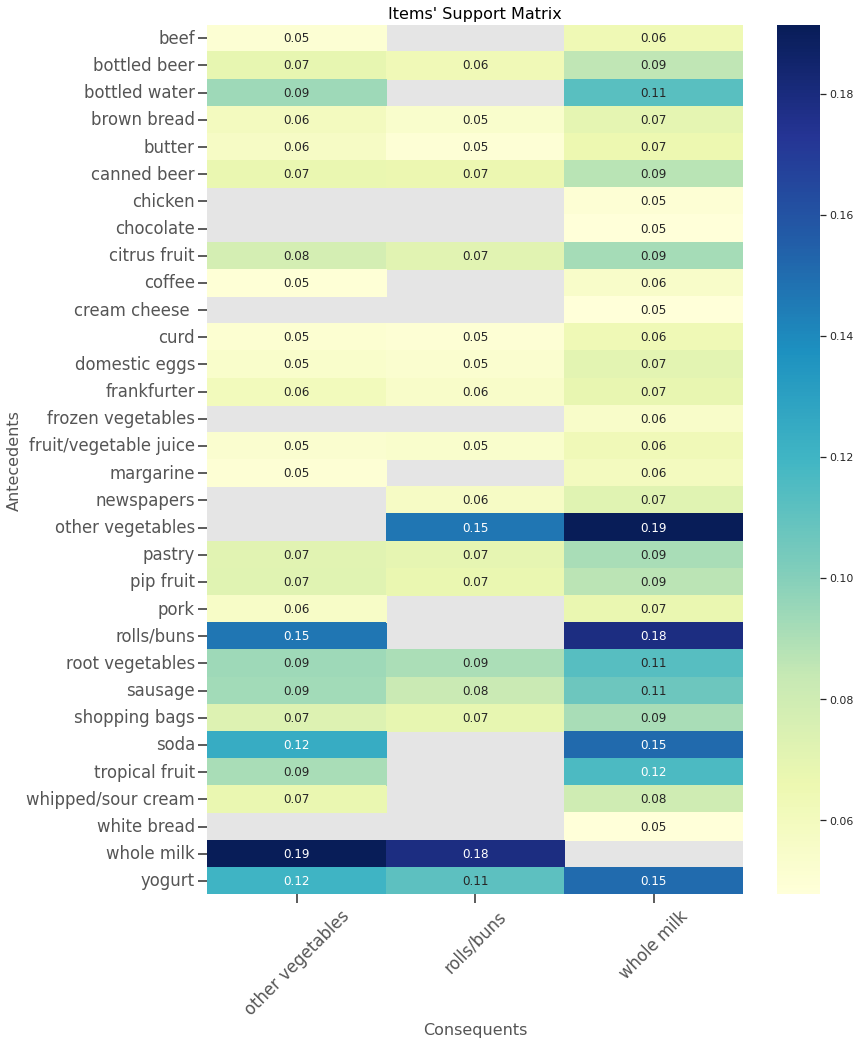

In [26]:
# plot a heatmap to know how strong the association is based on lift values
pivot_support = rules_best_eda.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 16))
sns.set()
ax = sns.heatmap(data=pivot_support, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

In [27]:
# plot a heatmap to know how strong the association is regarding lift values
pivot_confidence = rules_best_eda.pivot(index='antecedents', columns='consequents', values='confidence')

fig = ff.create_annotated_heatmap(pivot_confidence.to_numpy().round(2), 
                                  x=list(pivot_confidence.columns), 
                                  y=list(pivot_confidence.index), 
                                  colorscale=['grey', 'orange', 'red'], 
                                  font_colors=['white', 'white', 'white'])
fig.update_layout(
    template='simple_white',
    autosize=False,
    width=800,
    height=800,
    title="Lift Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Caliber",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.22, title_y=0.98)
fig.update_traces(showscale=True)
fig.show()

In [28]:
# plot the network to see the connections between the top 10 percentile items
network_A = list(rules_best_eda["antecedents"].unique())
network_B = list(rules_best_eda["consequents"].unique())
node_list = list(set(network_A+network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules_best_eda.iterrows():
    G.add_edges_from([(j["antecedents"],j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=15,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' has {} connections'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Connection of Top 10 Percentile Items',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.update_layout(title_x=0.5, title_y=0.96)
iplot(fig)

In [29]:
#Scatter plot to see where the best consequents of whole milk are
rules_fix = rules.copy(deep=True)
rules_fix['antecedents'] = rules_fix['antecedents'].apply(lambda a: ', '.join(list(a)))
rules_fix['consequents'] = rules_fix['consequents'].apply(lambda a: ', '.join(list(a)))

fig=go.Figure()
fig.add_trace(
    go.Scatter(x=rules_fix['support'], y=rules_fix['zhang'], name='All Combinations', mode='markers', opacity=0.3)
)
fig.add_trace(
    go.Scatter(x=rules_best['support'], y=rules_best['zhang'], name='Top 5 Consequents', mode='markers')
)

annotaion_01={'x':'0.191380', 'y':'0.181562', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Other Vegetables', 'textangle':-90, 'font':{'size':12, 'color':'green'}}
annotaion_02={'x':'0.178553', 'y':'0.189591', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Rolls/buns', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_03={'x':'0.151103', 'y':'0.091184', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Soda', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_04={'x':'0.116470', 'y':'0.148768', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Tropical Fruit', 'textangle':-90,'font':{'size':12, 'color':'green'}}
annotaion_05={'x':'0.150590', 'y':'0.256640', 'showarrow':True, 'arrowhead':4, 'xshift':-2,'yshift':8,'text':'Yogurt', 'textangle':-90,'font':{'size':12, 'color':'green'}}

fig.update_layout({ 
    'annotations':[annotaion_01, annotaion_02, annotaion_03,
      annotaion_04, annotaion_05], 
      'showlegend':True, 'legend':{'x':0.76, 'y':0.04, 'bgcolor':'rgb(246, 228, 129)'}
      })
fig.update_xaxes(
        title_text = "Support",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_yaxes(
        title_text = "Confidence",
        title_font = {"size": 16},
        title_standoff = 12)
fig.update_layout(title='Contribution of The Top Items', title_x=0.5, title_y=0.86)
fig.show()

In [30]:
# the comparison between the sopport and confidence of all combinations
fig = px.scatter(rules_fix, x='support', y='confidence', 
                 color='lift', hover_data=['antecedents', 'confidence'],
                 labels={
                     "support": "Support",
                     "confidence": "Confidence",
                     'lift': 'Lift'
                 },
                title="Support v.s. Confidence")
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

In [31]:
# plot a network to show the connections of all combinations
network_A = list(rules_fix["antecedents"].unique())
network_B = list(rules_fix["consequents"].unique())
node_list = list(set(network_A+network_B))
G = nx.Graph()
for i in node_list:
    G.add_node(i)
for i,j in rules_fix.iterrows():
    G.add_edges_from([(j["antecedents"],j["consequents"])])
pos = nx.spring_layout(G, k=0.5, dim=2, iterations=400)
for n, p in pos.items():
    G.nodes[n]['pos'] = p

edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        colorscale='electric',
        reversescale=False,
        color=[],
        size=8,
        colorbar=dict(
            thickness=10,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=0)))
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])

for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    node_info = str(adjacencies[0]) +' has {} connections'.format(str(len(adjacencies[1])))
    node_trace['text']+=tuple([node_info])

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='All Item Network',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))
fig.update_layout(title_x=0.5, title_y=0.96)
iplot(fig)

In [32]:
# review the numbers of all items
freq_bk = bk.apply(pd.value_counts).transpose().sum().sort_values(ascending=False)
freq_bk.head(10)

whole milk          2502.0
other vegetables    1898.0
rolls/buns          1716.0
soda                1514.0
yogurt              1334.0
root vegetables     1071.0
tropical fruit      1032.0
bottled water        933.0
sausage              924.0
citrus fruit         812.0
dtype: float64

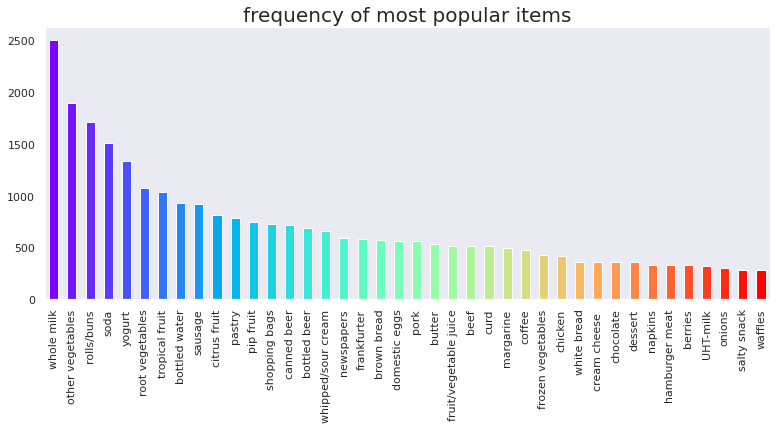

In [33]:
# Again, plot a bar chart to review the top 40 items being sold
color = plt.cm.rainbow(np.linspace(0, 1, 40))
freq_bk.head(40).plot.bar(color = color, figsize=(13,5))
plt.title('frequency of most popular items', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [34]:
# fill na as 'NA' to tranform every value into string 
bk.fillna('NA',inplace=True)
bk_2d = bk.values.tolist()
bk_2d[0]

['whole milk',
 'pastry',
 'salty snack',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [35]:
# iterate every value which is not 'NA'
for i in range(len(bk_2d)):
    bk_2d[i] = [x for x in bk_2d[i] if not x=='NA']
bk_2d[0:5]

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles']]

In [36]:
# create a item matrix
TE = TransactionEncoder()
TE.fit(bk_2d)
item_matrix = TE.transform(bk_2d)
bk_item = pd.DataFrame(item_matrix, columns = TE.columns_)
print(bk_item.shape)
bk_item.head()

(14963, 167)


,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [37]:
# get the support values by Apriori
bk_freq_items = apriori(bk_item, min_support=0.01, use_colnames=True, max_len=2)
bk_freq_items.sort_values(by = "support", ascending = False)

,support,itemsets
62,0.157923,(whole milk)
40,0.122101,(other vegetables)
46,0.110005,(rolls/buns)
52,0.097106,(soda)
63,0.085879,(yogurt)
...,...,...
64,0.010559,"(rolls/buns, other vegetables)"
29,0.010559,(herbs)
45,0.010493,(red/blush wine)
44,0.010158,(processed cheese)


In [38]:
# get a dataframe with support, confidence, and lift values by Association Rules 
bk_rules = association_rules(bk_freq_items, metric = "confidence", min_threshold = 0)
bk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
1,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
2,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
3,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
4,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
5,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
6,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
7,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
8,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
9,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861


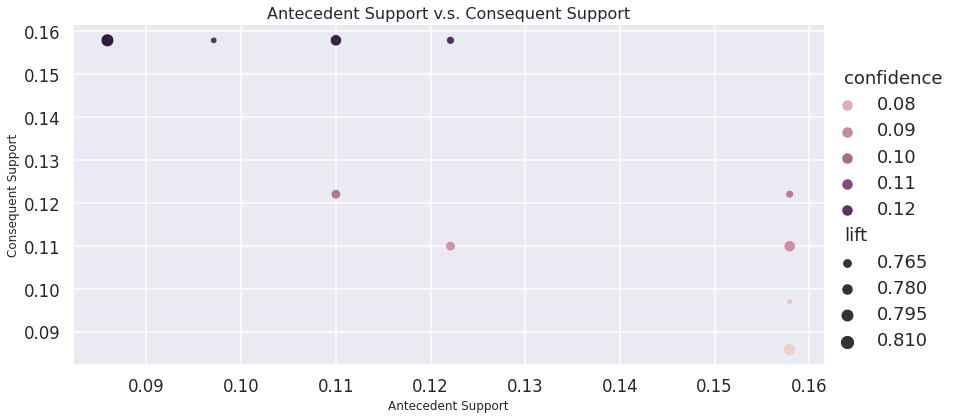

In [39]:
# only 10 combinations when preparing it based on each transaction
sns.set_context("talk")
sns.relplot(x='antecedent support', y='consequent support', data=bk_rules, 
            size='lift', hue='confidence', height=6, aspect=2)
plt.title("Antecedent Support v.s. Consequent Support", fontsize=16, y=1.02)
plt.xlabel('Antecedent Support', fontsize=12)
plt.ylabel('Consequent Support', fontsize=12)
plt.show()

In [40]:
# Add Zhang's values to complete the dataframe
bk_rules_zhangs_list = zhangs_rule(bk_rules)
bk_rules = bk_rules.assign(zhang = bk_rules_zhangs_list)
bk_rules['antecedents'] = bk_rules['antecedents'].apply(lambda a: ', '.join(list(a)))
bk_rules['consequents'] = bk_rules['consequents'].apply(lambda a: ', '.join(list(a)))
bk_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhang
0,rolls/buns,other vegetables,0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117,-0.234091
1,other vegetables,rolls/buns,0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249,-0.236553
2,whole milk,other vegetables,0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928,-0.262461
3,other vegetables,whole milk,0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551,-0.254477
4,whole milk,rolls/buns,0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474


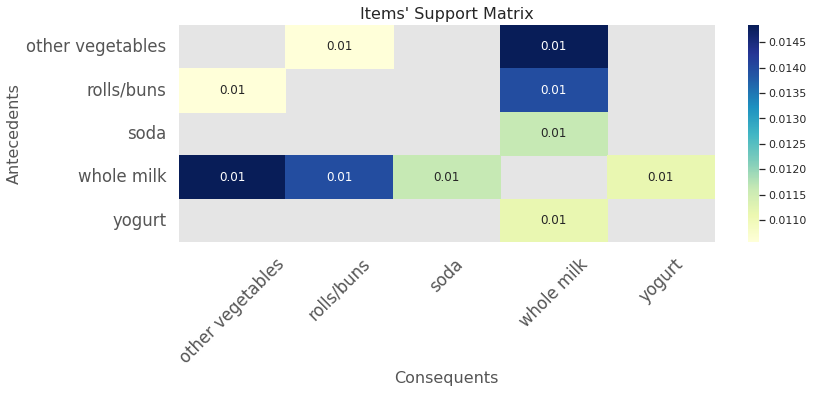

In [41]:
# plot a heatmap to know how strong the association is based on lift values
bk_pivot_suport = bk_rules.pivot(index='antecedents', columns='consequents', values='support')

sns.set_context("talk")
plt.style.use('ggplot')
plt.subplots(figsize=(12, 4))
sns.set()
ax = sns.heatmap(data=bk_pivot_suport, annot=True, fmt='.2f', cmap='YlGnBu', cbar=True)
plt.title("Items' Support Matrix", fontsize=16, y=1.02)
ax.set_xlabel("Consequents",fontsize=16)
ax.set_ylabel("Antecedents",fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show() 

In [42]:
# review the heatmap see whether whole milk is also the item with the highest confidence
bk_pivot_confi = bk_rules.pivot(index = 'antecedents', columns = 'consequents', values= 'confidence')

fig = go.Figure(data=go.Heatmap(x=bk_pivot_confi.columns, y=bk_pivot_confi.index, z=bk_pivot_confi, 
                                colorscale='ylgnbu', reversescale=False))
fig.update_layout(
    template='ggplot2',
    autosize=False,
    width=800,
    height=400,
    title="Confidence Matrix",
    xaxis_title='Consequents',
    yaxis_title='Antecedents',
    legend_title="Legend Title",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"
    )
)
fig.update_layout(title_x=0.5, title_y=0.86)
fig.show()

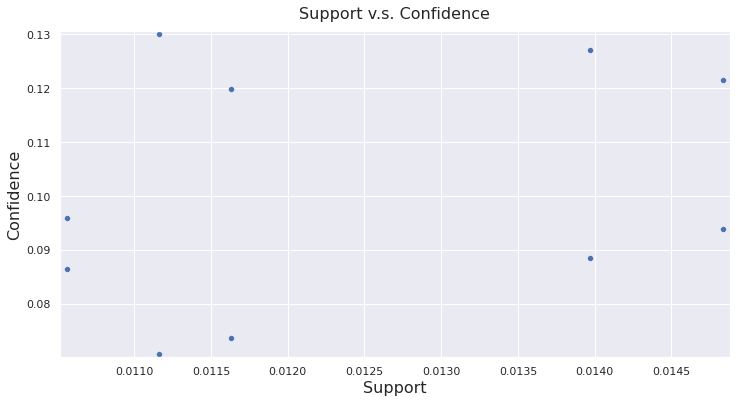

In [43]:
# See the distribution of these 10 combinations
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x = "support", y = "confidence", data = bk_rules, alpha=1)
plt.title("Support v.s. Confidence", fontsize=16, y=1.02)
ax.set_xlabel("Support",fontsize=16)
ax.set_ylabel("Confidence",fontsize=16)
plt.margins(0.01,0.01)
plt.show()

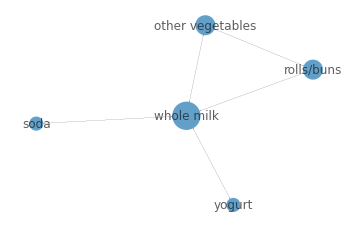

In [44]:
bk_network = bk_rules[['antecedents', 'consequents']]

bk_network_G = nx.from_pandas_edgelist(
    bk_network,
    source = 'antecedents',
    target = 'consequents',
    create_using = nx.DiGraph())

network_bt = nx.in_degree_centrality(bk_network_G)
bk_network_bt = pd.DataFrame(list(network_bt.items()), columns = ['item', 'centrality'])
bk_network_bt = bk_network_bt.dropna(axis=0)

pos = nx.kamada_kawai_layout(bk_network_G)

sizes = [x[1]*100 for x in bk_network_G.degree()]

nx.draw_networkx(bk_network_G, pos, 
    with_labels = True, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

plt.axis('off')
plt.show()
